In [0]:
!pip install pulp

In [0]:
from pulp import *
import networkx as nx
import matplotlib.pyplot as plt
print(nx.__version__)

2.3


In [0]:
# graph taken from here: https://www.coursera.org/learn/advanced-algorithms-and-complexity/lecture/LAat2/vertex-cover

G = nx.Graph()
G.add_edge(1,2)
G.add_edge(1,8)
G.add_edge(1,4)
G.add_edge(1,7)
G.add_edge(2,4)
G.add_edge(2,6)
G.add_edge(3,6)
G.add_edge(3,4)
G.add_edge(4,5)
G.add_edge(5,6)
G.add_edge(6,7)
G.add_edge(7,8)

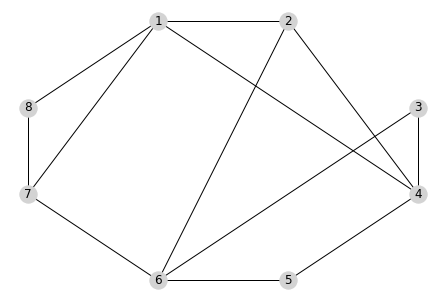

In [0]:
fixed_positions = {1:(2,6), 2:(4,6), 3:(6,4), 4:(6,2), 5:(4,0), 6:(2,0), 
                   7:(0,2), 8:(0,4)}
fixed_nodes = fixed_positions.keys()
pos = nx.spring_layout(G, pos=fixed_positions, fixed=fixed_nodes)
nx.draw(G, pos, with_labels = True, node_color='lightgrey')
plt.show()

### LP Approximation

In [0]:
problem = LpProblem("problemName", LpMinimize) # could name it "model"

# variables
nodes = LpVariable.dicts("nodes", list(range(8)), 0, 1, LpBinary)
# print(nodes)

# constraints
problem += nodes[0] + nodes[1] >= 1
problem += nodes[0] + nodes[7] >= 1
problem += nodes[0] + nodes[3] >= 1
problem += nodes[0] + nodes[6] >= 1
problem += nodes[1] + nodes[3] >= 1
problem += nodes[1] + nodes[5] >= 1
problem += nodes[2] + nodes[5] >= 1
problem += nodes[2] + nodes[3] >= 1
problem += nodes[3] + nodes[4] >= 1
problem += nodes[4] + nodes[5] >= 1
problem += nodes[5] + nodes[6] >= 1
problem += nodes[6] + nodes[7] >= 1

# objective function
problem += sum(nodes[0] + nodes[1] + nodes[2] + nodes[3] + nodes[4] 
           + nodes[5] + nodes[6] + nodes[7])
print(problem)

problemName:
MINIMIZE
1*nodes_0 + 1*nodes_1 + 1*nodes_2 + 1*nodes_3 + 1*nodes_4 + 1*nodes_5 + 1*nodes_6 + 1*nodes_7 + 0
SUBJECT TO
_C1: nodes_0 + nodes_1 >= 1

_C2: nodes_0 + nodes_7 >= 1

_C3: nodes_0 + nodes_3 >= 1

_C4: nodes_0 + nodes_6 >= 1

_C5: nodes_1 + nodes_3 >= 1

_C6: nodes_1 + nodes_5 >= 1

_C7: nodes_2 + nodes_5 >= 1

_C8: nodes_2 + nodes_3 >= 1

_C9: nodes_3 + nodes_4 >= 1

_C10: nodes_4 + nodes_5 >= 1

_C11: nodes_5 + nodes_6 >= 1

_C12: nodes_6 + nodes_7 >= 1

VARIABLES
0 <= nodes_0 <= 1 Integer
0 <= nodes_1 <= 1 Integer
0 <= nodes_2 <= 1 Integer
0 <= nodes_3 <= 1 Integer
0 <= nodes_4 <= 1 Integer
0 <= nodes_5 <= 1 Integer
0 <= nodes_6 <= 1 Integer
0 <= nodes_7 <= 1 Integer



In [0]:
print(problem.solve())
print(LpStatus[problem.status])

# optimized value of the objective function
print(f"Objective function: {value(problem.objective)}")

for i in range(8):
  print(f"{i} : {nodes[i].varValue}")
  

1
Optimal
Objective function: 4.0
0 : 1.0
1 : 0.0
2 : 0.0
3 : 1.0
4 : 0.0
5 : 1.0
6 : 0.0
7 : 1.0


### Approximation Algorithm (non-LP)

```
C <- empty set
While E is not empty
    {u,v} <- any edge from E
    add {u,v} to C
    remove from E all edges incident to u,v
return C
```

In [0]:
from random import sample

H = G.copy()
C = set()
E = list(H.edges())
# print(sample(E, 1))

print(E)
while len(E) > 0:
  
  # get any edge from E
  e = sample(E, 1)
  print(f"randomly selected edge: {e}")
  
  # select the nodes from this edge
  u = e[0][0]
  v = e[0][1]
  
  # add {u,v} to C
  C.add(u)
  C.add(v) 
  print(f"nodes added to C: {u,v}")
  
  # get all edges incident to u and v
  ebunch = list(H.edges([u,v]))
  print(f"edges incident to u and v: {ebunch}")
  
  # remove those edges from graph
  for e in ebunch:
    #print(e[0],e[1])
    H.remove_edge(e[0], e[1])
    E = list(H.edges())
  print(f"remaining edges: {E}\n")
  
  # recreate graph from remaining edges
  H = nx.Graph()
  H.add_edges_from(list(E))
  
print(C)
print(f"# nodes in selected vertex cover: {len(C)}")


[(1, 2), (1, 8), (1, 4), (1, 7), (2, 4), (2, 6), (8, 7), (4, 3), (4, 5), (7, 6), (6, 3), (6, 5)]
randomly selected edge: [(4, 3)]
nodes added to C: (4, 3)
edges incident to u and v: [(4, 1), (4, 2), (4, 3), (4, 5), (3, 6)]
remaining edges: [(1, 2), (1, 8), (1, 7), (2, 6), (8, 7), (7, 6), (6, 5)]

randomly selected edge: [(6, 5)]
nodes added to C: (6, 5)
edges incident to u and v: [(6, 2), (6, 7), (6, 5)]
remaining edges: [(1, 2), (1, 8), (1, 7), (8, 7)]

randomly selected edge: [(8, 7)]
nodes added to C: (8, 7)
edges incident to u and v: [(8, 1), (8, 7), (7, 1)]
remaining edges: [(1, 2)]

randomly selected edge: [(1, 2)]
nodes added to C: (1, 2)
edges incident to u and v: [(1, 2)]
remaining edges: []

{1, 2, 3, 4, 5, 6, 7, 8}
# nodes in selected vertex cover: 8
